<a href="https://colab.research.google.com/github/AkashChauhanSoftEngi/Data-Science-Concepts-using-python/blob/main/9.%20FaceDetectionUsingOpenCV_FROM_IMG_AND_VIDEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install opencv-python

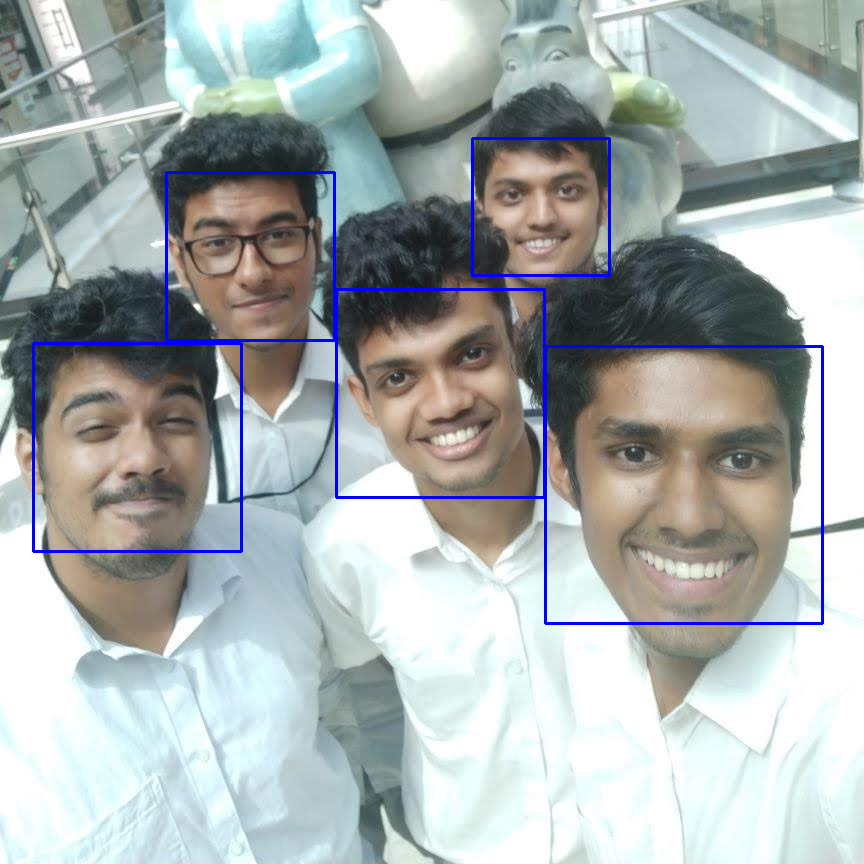

-1

In [11]:
# From Image, Face Detection
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Research_Work/Data_Science_Projects/IIT_Data_Science_Course/haarcascade_frontalface_default.xml')

# from google.colab import files
# test = files.upload()

# Read the input image
img = cv2.imread('/content/drive/MyDrive/Research_Work/Data_Science_Projects/IIT_Data_Science_Course/test.jpeg')

# Convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)


from google.colab.patches import cv2_imshow

# Display the output
cv2_imshow(img)
cv2.waitKey()

In [11]:
# Enable web cam, and take photo from that web cam and fo face detection

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


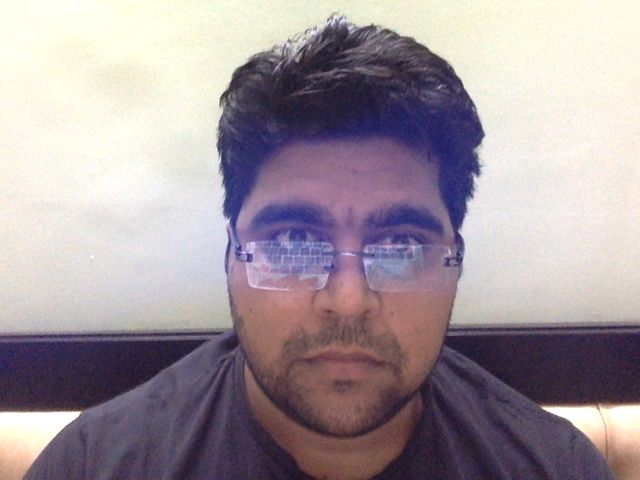

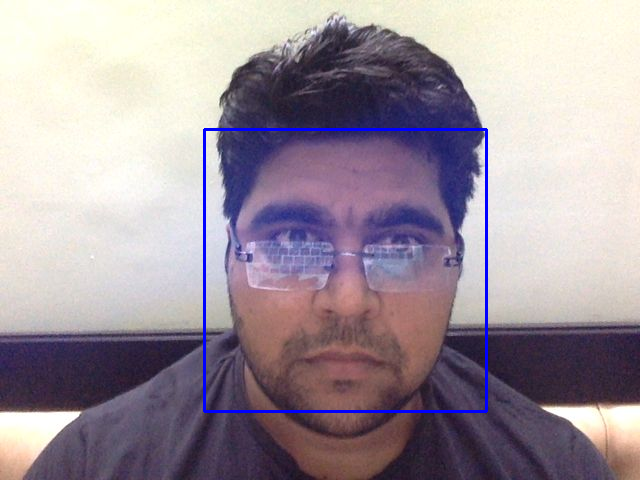

In [12]:
# Take Photo from web cam and do face detection

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


# From Video

import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Research_Work/Data_Science_Projects/IIT_Data_Science_Course/haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(-1)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

# Read the frame
img = cv2.imread('photo.jpg')

if(img is not None):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to grayscale
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect the faces
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Draw the rectangle around each face
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Display
from google.colab.patches import cv2_imshow

# Display the output
if(img is not None):
  cv2_imshow(img)

# Release the VideoCapture object
cap.release()

# while True:
#     # Read the frame
#     img = cv2.imread('photo.jpg')

#     if(img is not None):
#       gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Convert to grayscale
#     # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Detect the faces
#     faces = face_cascade.detectMultiScale(gray, 1.1, 4)

#     # Draw the rectangle around each face
#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

#     # Display
#     from google.colab.patches import cv2_imshow

#     # Display the output
#     if(img is not None):
#       cv2_imshow(img)

#     # Stop if escape key is pressed
#     k = cv2.waitKey(30) & 0xff
#     if k==27:
#         break
        
# # Release the VideoCapture object
# cap.release()

In [ ]:
# FROM LIVE VIDEO! {Need more work!}
import cv2

# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/Research_Work/Data_Science_Projects/IIT_Data_Science_Course/haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    if(img is not None):
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Display
    # cv2.imshow('img', img)

    # Display
    from google.colab.patches import cv2_imshow

    # Display the output
    if(img is not None):
      cv2_imshow(img)

    # Stop if escape key is pressed
    k = cv2.waitKey(30) & 0xff
    if k==27:
        break
        
# Release the VideoCapture object
cap.release()